In this section, we will build a few SIR models, and will use them to answer some “what if” questions
(simulation models are great for this!).

Note that in SIR, the value of 1/β is typically interpreted as the average number of days for an infected
person to keep infecting susceptible; 1/γ – the number of days for an infected person to recover. 

For instance, saying “it takes on average 10 days to recover” is the same as saying “1/γ = 10”, or γ=0.1.
For all problems below, assume population of N=120,000 people, with one infected on “day zero”
(so, I[0] = 1/N = 1/120000).

As always, pick the multiple choice with the number closest to your result. To see the full picture, make
sure you simulate enough daypoints to capture the peak (make a plot for each problem to be sure).

In [139]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Question 5: (5 pts)
## Model A: baseline

Consider a baseline SIR model discussed in the class – with only two parameters, β and γ.

If β=0.2, and the recovery takes on average 20 days, what would be the highest (peak) fraction of
infected people?

In [140]:
def SIR(beta, gamma, kvacc=0, N=120000, days=200):
    """
    Fit and Plot an SIR (Succeptible, Infected, Responded) model

    Args:
        beta [num or Callable]: Fraction to be infected. Beta can be a ratio or a function of time t. 
        gamma [num or Callable]: Fraction recovered. Gamma can be a ratio or a function of time t
        kvacc [num]: Ratio of population vaccinated
        N [int]: Population size
        days [int]: Number of days to model
    
    Returns: [list] Infection rates for each day (for checkpoins)
    """

    I = [1/N]
    S = [1.0-I[0]]
    R = [0]
    T = [0]

    for t in range(days):
        b = beta if not callable(beta) else beta(t)
        g = gamma if not callable(gamma) else gamma(t)
        # (Succeptible)-(new infected, previously succeptible) - (vaccinated)
        # each infected person infects b fraction of succeptible
        s = S[t] - (I[t] * b * S[t]) - (kvacc * S[t])
        # (Infected) + (new infected, previously succeptible)- (new recovered, previously infected)
        i = I[t] + (I[t] * b * S[t]) - (I[t] * g)
        # (Recovered) + (new recovered, previously infected) + (vaccinated)
        r = R[t] + (I[t] * g) + (kvacc * S[t])

        # S + I + R = 1 (whole population)
        S.append(s)
        I.append(i)
        R.append(r)
        T.append(t+1)

    Tmax_I = np.argmax(I) # Day of highest infection rate
    Fmax_I = I[Tmax_I] # Highest infection rate

    _ = plt.figure()
    plt.plot(T, S, "green")
    plt.plot(T, I, "red")
    plt.plot(T, R, "black")
    plt.axvline(Tmax_I, color="red", linestyle="--")
    plt.text(Tmax_I,1,f"Peak {Fmax_I *100:.2f}% infected after {Tmax_I} days", color="r")
    plt.xlabel("Days")
    plt.ylabel("Fraction")
    plt.grid(True)
    return I

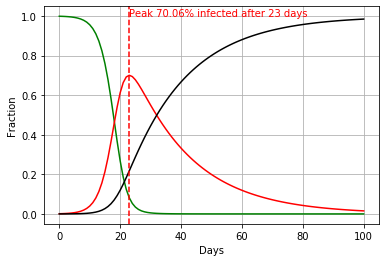

In [141]:
# Recreating analysis from class
_ = SIR(0.5,0.05,days=100, N=1000)

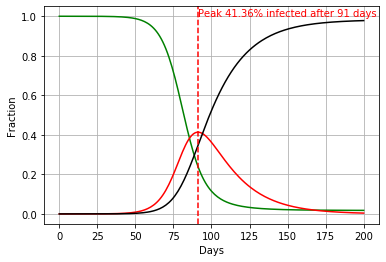

In [142]:
# This questions

# 1/y = 20
# y = 0.05
infections = SIR(0.2, 0.05)
assert np.argmax(infections)==91

## Question 6: (6 pts)

## Model B: vaccine

Consider the same model A as above. Let’s say, it represents a seasonal flu outbreak, and we already
have the vaccine. Therefore, let’s add k vacc vaccination parameter to the SIR model (as was described in
the class).

What minimal 1 fraction of the population do we have to vaccinate, to ensure that the peak number of
infected will not exceed 2%?

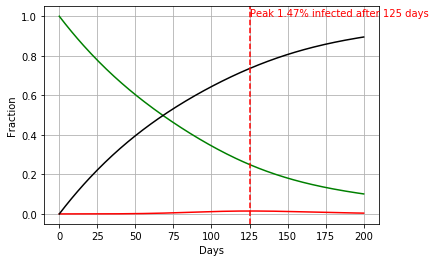

In [143]:
infections = SIR(0.2, 0.05, kvacc=.01)
assert np.argmax(infections)==125

## Question 7: (3 pts)
## Model C: faster recovery

Consider the same model A as above (that is, without vaccination). Assume that we have discovered,
that vitamin D can shorten the average recovery time 1/γ by half. Keeping β=0.2 and reducing the
average recovery time by half, will we be able to keep the peak infection under 10%?

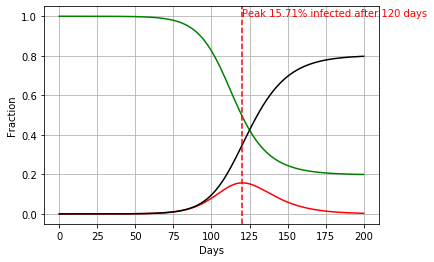

In [144]:
# y = 1/10
infections = SIR(0.2, 0.1)
assert np.argmax(infections)==120

## Question 8: (6 pts)
## Model D: social distancing

Consider the same model A as above.

After the first month of pandemic, we realized that the things are not looking good, and decided to
implement social distancing. By how much should we reduce the value of β=0.2 after the first month (30
days), to make sure the infection won’t peak above 10%?

Important: social distancing is expensive, so pick the lowest factor to achieve the goal.

- 1.5 times
- 1.7 times
- 2.0 times
- 2.5 times
- 3.0 times

Checkpoint: The peak will happen on the 249 th day. Clearly, social distancing makes the pandemic longer,
so make sure you simulate enough daypoints to capture the peak value!

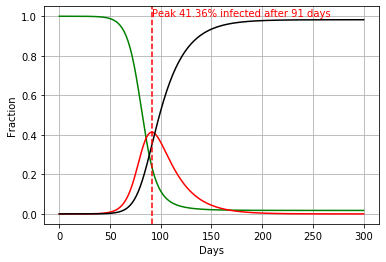

In [145]:
infections = SIR(0.2, 0.05, days=300)

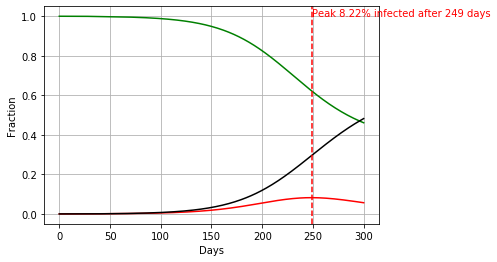

In [146]:
#.08 = .2/2.5
infections = SIR(lambda t: .2 if t <=30 else .2/2.5, 0.05, days=300)
assert np.argmax(infections) == 249